# Practice: Black Friday Prediction Project

## The whole notebook references to Black Friday Sales: Analysis and Prediction from below links:
https://www.kaggle.com/ishanvardhan/black-friday-sales-analysis-and-prediction/data <br>
https://www.kaggle.com/ssaketh97/black-friday-sale-analysis

## About data & Goal

<ul>
    <li>The datasets has a sample of the transactions made in a retail store.</li>
    <li>The store wants to know better customer purchases behaviour against different products.</li>
    <li>Main Goal: Predict the amount of purchases (dependent)</li>
</ul>

<ul>
    <li>Understand the customers based on their purchasing pattern.</li>
    <li>Derive insights about the puchasing pattern from different variables such as Age groups, Occupation, City_Categories.</li>
    <li>Contruct prediction model and use the model on the test data.</li>
</ul>



In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("train.csv")
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


### From the above output, we can observe that there were 550068 transactions in total. However, Product_Category_2 and Product_Category_3 seem like they have null values. 

In [4]:
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


## Data Cleaning

### Now we're gonna use Imputer from Scikit-Learn package in order to fill the missing values.
<ul>
    <li>Imputer fills missing values with some statistics (e.g. mean, median, ...) of the data</li>
    <li>To avoid data leakage during cross-validation, it computes the statistic on the train data during the fit, stores it and uses it on the test data, during the transform</li>
</ul>

In [5]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean') #replaces 'NaN's and fill them with the col's mean.
imputer = imputer.fit(data.iloc[:, 9:11].values) #fits the cols we want
data.iloc[:, 9:11] = imputer.transform(data.iloc[:, 9:11].values)

### Now we can see that Product_Category_2 and Product_Category_3 are filled to 550068

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          550068 non-null  float64
 10  Product_Category_3          550068 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


### Let's drop unnecessary columns for our prediction

In [7]:
data.drop(['User_ID', 'Product_ID'], axis = 1, inplace = True)

In [8]:
data.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,9.842329,12.668243,8370
1,F,0-17,10,A,2,0,1,6.000000,14.000000,15200
2,F,0-17,10,A,2,0,12,9.842329,12.668243,1422
3,F,0-17,10,A,2,0,12,14.000000,12.668243,1057
4,M,55+,16,C,4+,0,8,9.842329,12.668243,7969


### Let's take off "+" from Age and Stay_In_Current_City_Years columns

In [9]:
data['Age'] = data['Age'].str.strip("+")
data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].str.strip("+").astype("float")

In [10]:
data.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2.0,0,3,9.842329,12.668243,8370
1,F,0-17,10,A,2.0,0,1,6.000000,14.000000,15200
2,F,0-17,10,A,2.0,0,12,9.842329,12.668243,1422
3,F,0-17,10,A,2.0,0,12,14.000000,12.668243,1057
4,M,55,16,C,4.0,0,8,9.842329,12.668243,7969


## Data Visualization

Use heatmap from Seaborn package to find correlationship between each variables

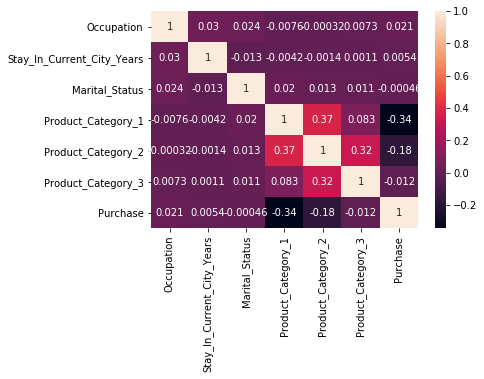

In [11]:
sns.heatmap(data.corr(), annot=True)

### Key take aways from the heatmap:
<ul> <b>Looks like there are three variables that have positive correlationship with Purchase: </b>
    <li>Occupation</li>
    <li>Stay_In_Current_City_Years</li>
    <li>Marital_Status</li>
</ul>

### Let's try to visualize those three variables
We are going to use FacetGrid from Seaborn package which let us to make multiple plots on a grid. Then we are going to put Purchase as Y-axis and Marital_Status as X-axis, in respect to Stay_In_Current_City_Years

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


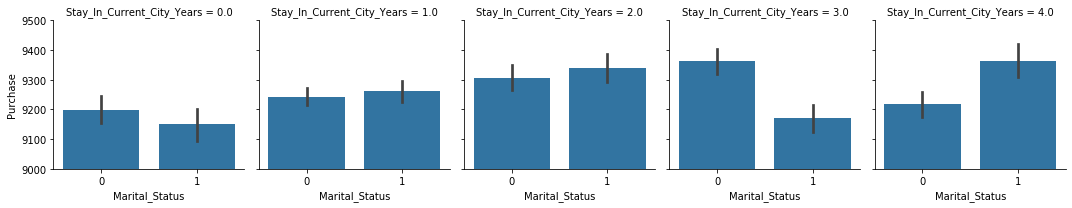

In [12]:
facetGrid = sns.FacetGrid(data, col="Stay_In_Current_City_Years")
facetGrid.map(sns.barplot, "Marital_Status", "Purchase")
facetGrid.set(ylim=(9000, 9500))

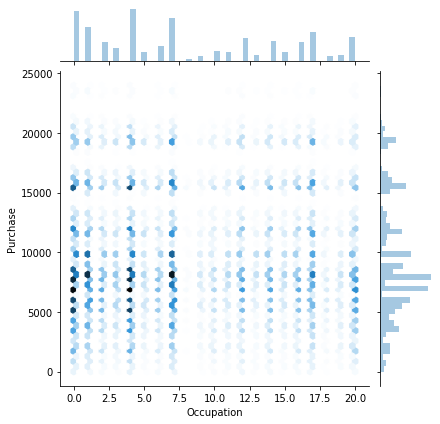

In [13]:
sns.jointplot(x="Occupation", y="Purchase", data=data, kind="hex")

### It looks like Occupation 4 has the highest purchase, closely followed by Occupation 0 and 7. Most of the purchases are done between 5000 to 10000.

### Now let's analyze purchase pattern based on City_Category

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


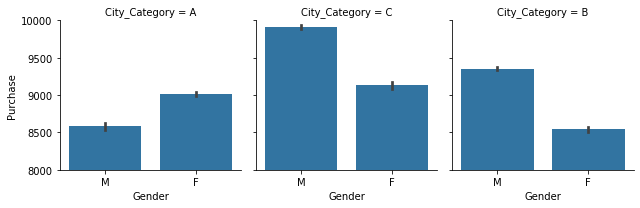

In [14]:
city_cat_facet = sns.FacetGrid(data, col="City_Category")
city_cat_facet.map(sns.barplot, "Gender", "Purchase")
city_cat_facet.set(ylim=(8000, 10000))

### City_Category C shows the highest purchase transactions. Except City_Category A, the other two city category shows large proportion of male customers. 

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


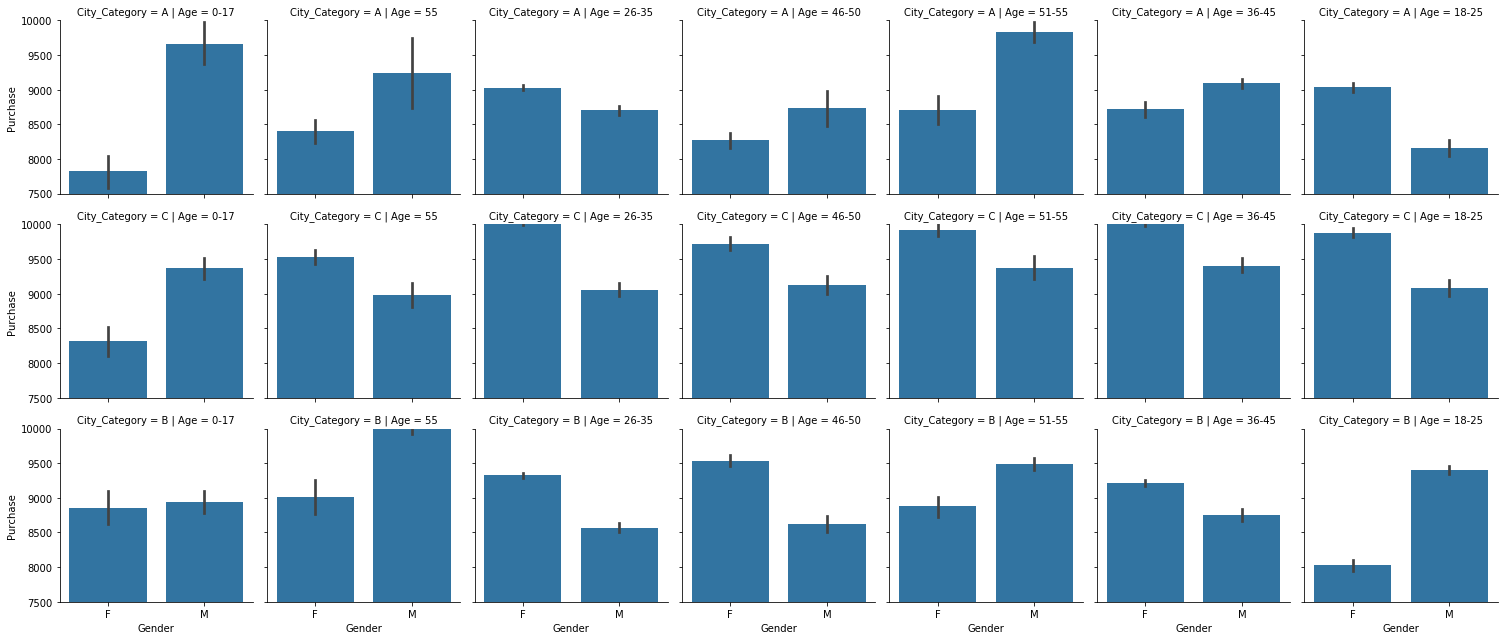

In [15]:
gender_city_cat_facet = sns.FacetGrid(data, col="Age", row="City_Category")
gender_city_cat_facet.map(sns.barplot, "Gender", "Purchase")
gender_city_cat_facet.set(ylim=(7500, 10000))

In [16]:
city_a_df = data[data["City_Category"] == "A"]
city_a_df.groupby(["Gender"])["Purchase"].count()

Gender
F     35704
M    112016
Name: Purchase, dtype: int64

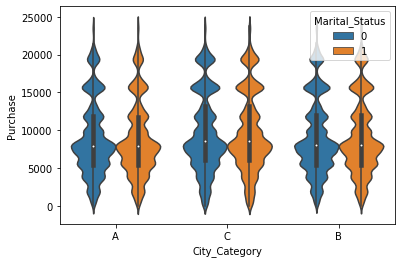

In [17]:
sns.violinplot(x="City_Category", y="Purchase", hue="Marital_Status", data=data)

### The violinplot does not seem to show the trend of purchase based on marital status across city categories well.  

### Let's use pointplot
A point plot represents an estimate of central tendency for a numeric variable by the position of scatter plot points and provides some indication of the uncertainty around that estimate using error bars. Point plot shows only mean values and error rate surrounding those mean values. They are not very much informative but are easy to find the change in a variable based on different categories.

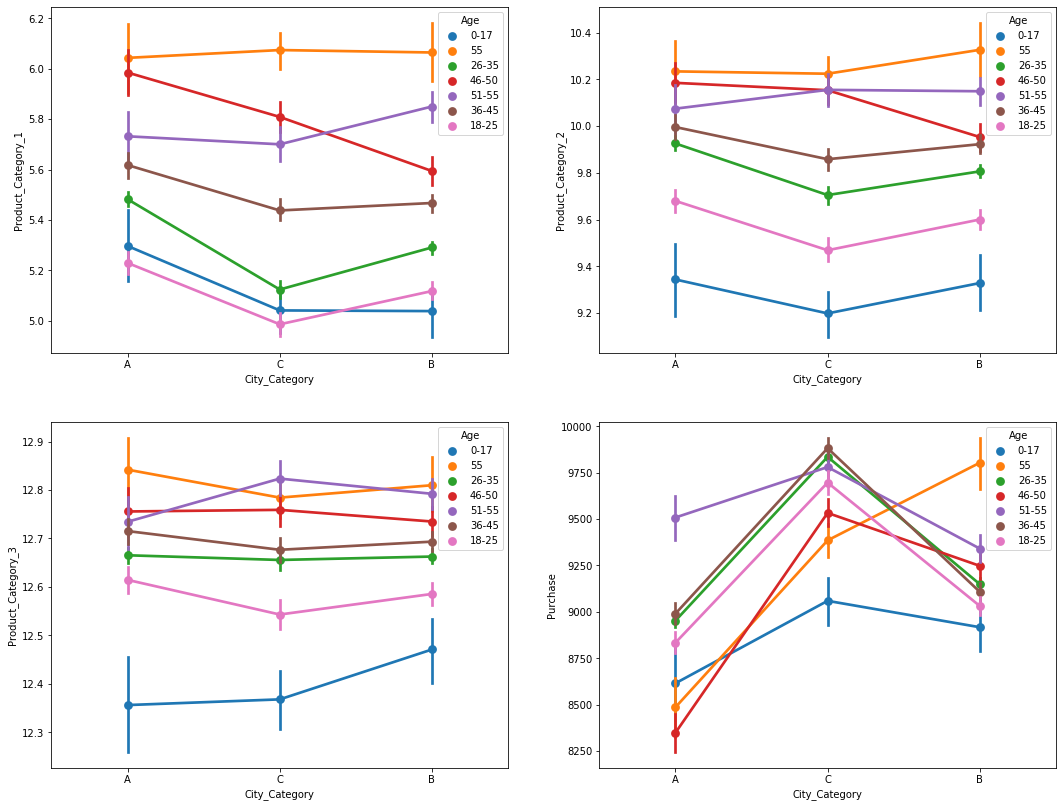

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18,14))

ax = sns.pointplot(data=data, y="Product_Category_1", x="City_Category", hue="Age", ax=axes[0,0])
ax = sns.pointplot(data=data, y="Product_Category_2", x="City_Category", hue="Age", ax=axes[0,1])
ax = sns.pointplot(data=data, y="Product_Category_3", x="City_Category", hue="Age", ax=axes[1,0])
ax = sns.pointplot(data=data, y="Purchase", x="City_Category", hue="Age", ax=axes[1,1])

### Which age group of customers are more likely to purchase?

In [19]:
d = data.groupby('Age')['Purchase'].mean()
d = pd.DataFrame({'Age':d.index, 'Avg Purchase':d.values})
d

,Age,Avg Purchase
0,0-17,8933.464640
1,18-25,9169.663606
2,26-35,9252.690633
3,36-45,9331.350695
4,46-50,9208.625697
5,51-55,9534.808031
6,55,9336.280459


Text(0.5, 1.0, 'Age group vs Average Purchases in $')

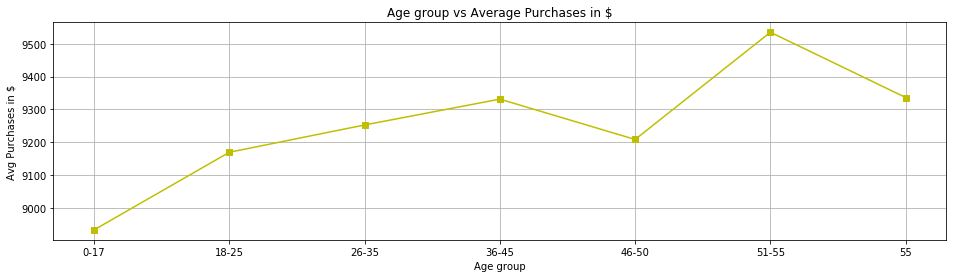

In [20]:
plt.figure(figsize = (16,4))
plt.plot('Age', 'Avg Purchase', 'ys-', data=d) #ys- is the style of the graph
plt.grid()
plt.xlabel('Age group')
plt.ylabel('Avg Purchases in $')
plt.title('Age group vs Average Purchases in $')

#### It seems like the graph shows increasing trend except age groups 46-50 and 55. We can derive insight from this that the higher the age group, higher the avg purchases. The highest group is 51-55.

### Which age group and gender have high visiting rate to the retail store?

In [21]:
age_data = data.groupby('Age')['Age'].count()
age_data

Age
0-17      15102
18-25     99660
26-35    219587
36-45    110013
46-50     45701
51-55     38501
55        21504
Name: Age, dtype: int64

In [22]:
gender_data = data.groupby('Gender')['Gender'].count()
gender_data

Gender
F    135809
M    414259
Name: Gender, dtype: int64

In [23]:
age_df = pd.DataFrame({'Age':age_data.index, 'Count':age_data.values})
gender_df = pd.DataFrame({'Gender':gender_data.index, 'Count':gender_data.values})

Text(0.5, 1.0, 'Gender split in data')

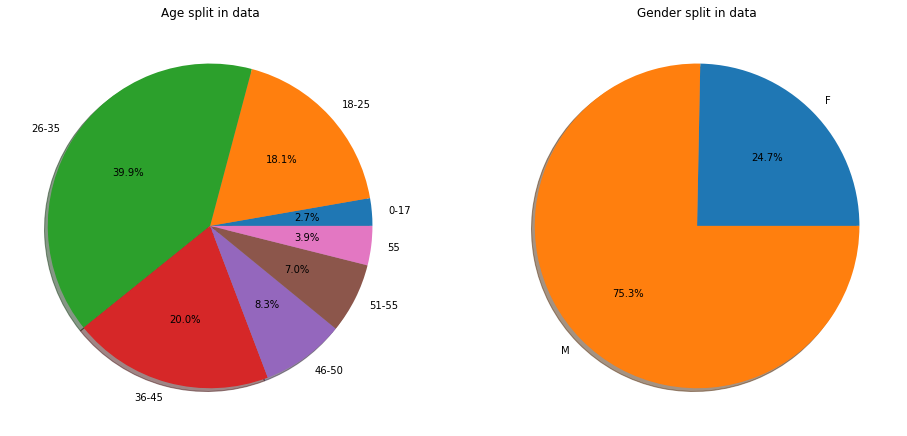

In [24]:
plt.figure(figsize=(16,16))

plt.subplot(121)
plt.pie(age_df['Count'], labels = age_df['Age'], autopct='%1.1f%%', shadow=True) #autopct가 있어야 차트위에 레이블이 됨
plt.title('Age split in data')

plt.subplot(122)
plt.pie(gender_df['Count'], labels = gender_df['Gender'], autopct='%1.1f%%', shadow=True)
plt.title('Gender split in data')

#### From the Gender split pie, we can observe that the store gets most of the male customers.
#### When we see Age split pie, 26-35 age group is the largest (almost 40%) followed by 36-45 (20%) and 18-25 (18%). Interestingly enough, 51-55 age group that showed the highest average purchase from the previous graph is only 7% of the data which indicates that most cutomers in 51-55 age group are most likely rich and very active customers. 

### Which occupation type have high purchase rate?

In [25]:
occ_data = data['Occupation'].value_counts()
occ_data

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

Text(0.5, 1.0, 'Spread of Occupation types in the sale')

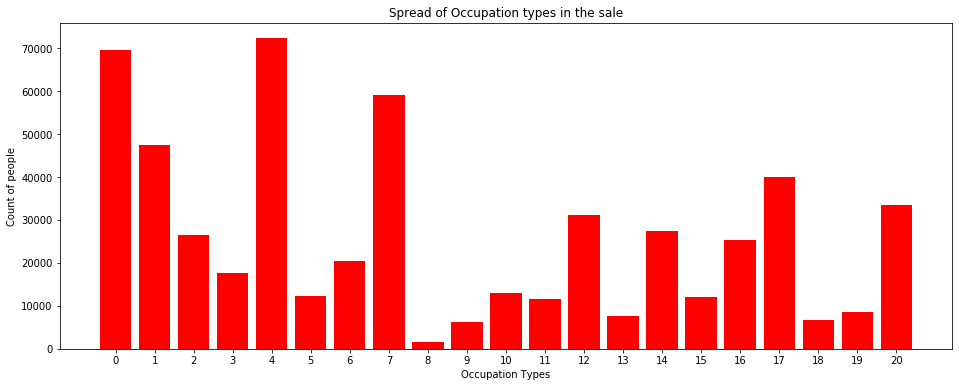

In [26]:
plt.figure(figsize=(16,6))
plt.bar(occ_data.index, occ_data.values, color='r')
plt.xticks(occ_data.index)
plt.xlabel('Occupation Types')
plt.ylabel('Count of people')
plt.title('Spread of Occupation types in the sale')

In [27]:
occ_gb = data.groupby('Occupation')['Purchase'].mean()
occ_gb

Occupation
0     9124.428588
1     8953.193270
2     8952.481683
3     9178.593088
4     9213.980251
5     9333.149298
6     9256.535691
7     9425.728223
8     9532.592497
9     8637.743761
10    8959.355375
11    9213.845848
12    9796.640239
13    9306.351061
14    9500.702772
15    9778.891163
16    9394.464349
17    9821.478236
18    9169.655844
19    8710.627231
20    8836.494905
Name: Purchase, dtype: float64

([<matplotlib.axis.XTick at 0x1a21cc3dd0>,
 <a list of 21 Text xticklabel objects>)

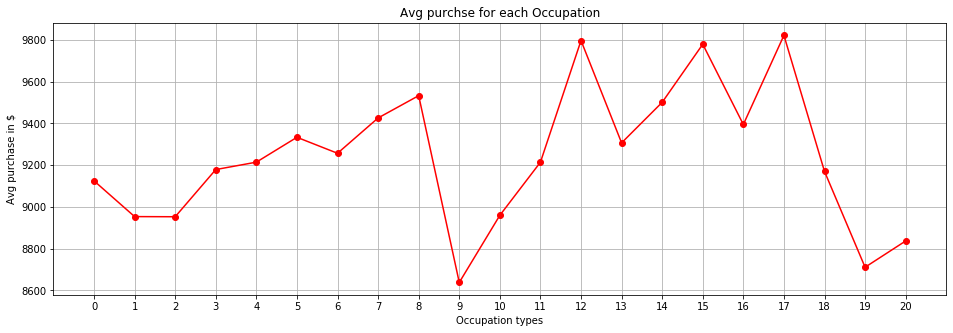

In [28]:
plt.figure(figsize=(16,5))
plt.grid()
plt.plot(occ_gb.index, occ_gb.values, 'ro-')
plt.xlabel('Occupation types')
plt.ylabel('Avg purchase in $')
plt.title('Avg purchse for each Occupation')
plt.xticks(occ_gb.index)

#### From the above graph, we can observe that occupation group 12, 15, 17  have the highest average purchase, which is unexpected from the previous graph. Interestingly enough, group 0, 4, 7 have low avg purchase rate while they have the highest transaction. 
#### Another interesting fact we can observe is that group 8 and 9 shows big drop in their avg purchase rate while their transaction counts are comparably similar. 
#### Group 11 and 12 have similar behaviors in both above and previous graph.

### Who has high purchase rate among newlt settled or people staying from long time

In [29]:
city_data = data['Stay_In_Current_City_Years'].value_counts()
city_data

1.0    193821
2.0    101838
3.0     95285
4.0     84726
0.0     74398
Name: Stay_In_Current_City_Years, dtype: int64

Text(0.5, 1.0, 'Years stayed in current city vs Count of transactions')

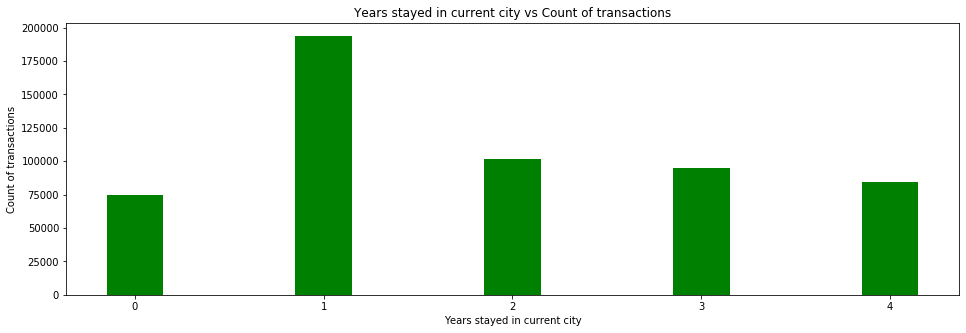

In [30]:
plt.figure(figsize=(16,5))
plt.bar(city_data.index, city_data.values, width=0.3, color='green')
plt.xlabel('Years stayed in current city')
plt.ylabel('Count of transactions')
plt.title('Years stayed in current city vs Count of transactions')

In [31]:
city_data_gb = data.groupby('Stay_In_Current_City_Years')['Purchase'].mean()
city_data_gb

Stay_In_Current_City_Years
0.0    9180.075123
1.0    9250.145923
2.0    9320.429810
3.0    9286.904119
4.0    9275.598872
Name: Purchase, dtype: float64

([<matplotlib.axis.XTick at 0x1a2216df50>,
 <a list of 5 Text xticklabel objects>)

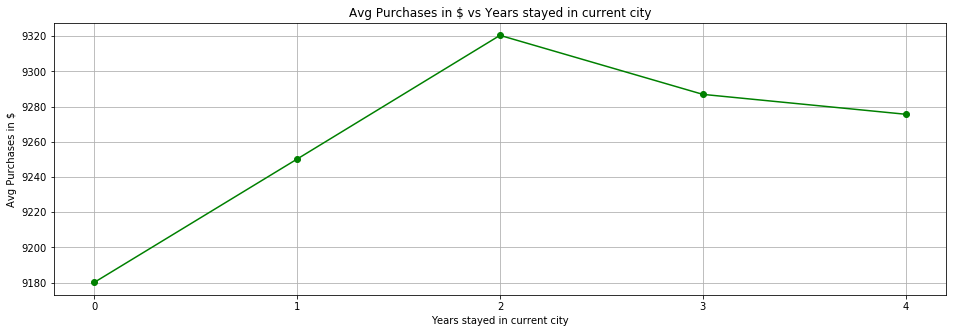

In [32]:
plt.figure(figsize=(16,5))
plt.plot(city_data_gb.index, city_data_gb.values, 'go-')
plt.grid()
plt.xlabel('Years stayed in current city')
plt.ylabel("Avg Purchases in $")
plt.title("Avg Purchases in $ vs Years stayed in current city")
plt.xticks(city_data_gb.index)

#### While the first graph shows the group with 1 year stayed in current city the highest transaction counts, the group with 2 years stayed in current city has the highest average purchases in dollars. 

### What are the top 10 products that made highest sales in the store?

In [69]:
data2 = pd.read_csv("train.csv")
pop_product1 = data2.groupby('Product_ID').agg({'Purchase':'sum'}).reset_index()
pop_product1.head()

,Product_ID,Purchase
0,P00000142,12837476
1,P00000242,3967496
2,P00000342,1296475
3,P00000442,441173
4,P00000542,807212


In [71]:
pop_product2 = data2['Product_ID'].value_counts()
pop_product2 = pd.DataFrame({'Product_ID':pop_product2.index, 'Counts':pop_product2.values})
pop_product2

,Product_ID,Counts
0,P00265242,1880
1,P00025442,1615
2,P00110742,1612
3,P00112142,1562
4,P00057642,1470
...,...,...
3626,P00057842,1
3627,P00065142,1
3628,P00241842,1
3629,P00167342,1


In [78]:
#merge pop_product1 and pop_product2 by Product_ID
product_df = pd.merge(pop_product1, pop_product2, left_on='Product_ID', right_on='Product_ID', how='left')
product_df = product_df.sort_values(['Purchase'], ascending=False)[0:10]


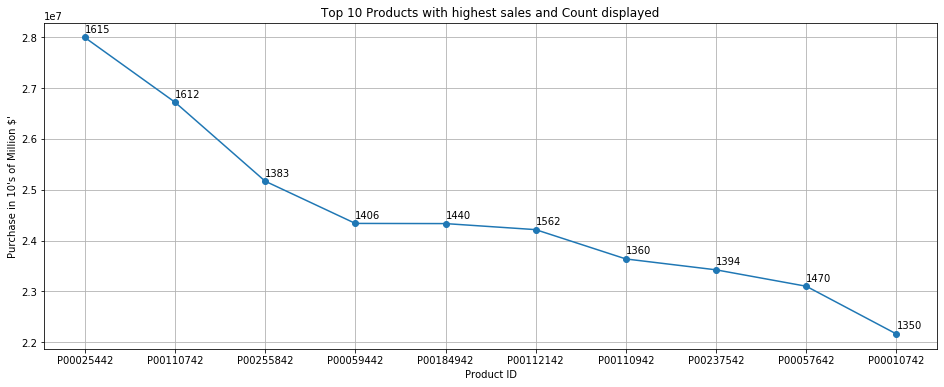

In [79]:
plt.figure(figsize=(16,6))
plt.grid()
plt.plot(product_df['Product_ID'], product_df['Purchase'], 'o-')
plt.xlabel("Product ID")
plt.ylabel("Purchase in 10\'s of Million $'")
plt.title("Top 10 Products with highest sales and Count displayed")

for a,b,c in zip(product_df['Product_ID'], product_df['Purchase'], product_df['Counts']):
    plt.text(a, b+100000, str(c))

#### Things to note from the graph:
<ul>
    <li>The difference between the counts of the first product (1615) and the counts of the second product (1612) is mere; this indicates the first product might have higher cost in producing that product than the second one.</li>
    <li>We can observe similar situations for all the other products.</li>
</ul>

### Who has high purchase rate based on marital status and gender?

In [99]:
gen_x_marital = data2.groupby(['Gender', 'Marital_Status'])['Gender'].count()
gen_x_marital

Gender  Marital_Status
F       0                  78821
        1                  56988
M       0                 245910
        1                 168349
Name: Gender, dtype: int64

Text(0.5, 1.0, 'Pie plot of Gender and Marital Status distribution in the data')

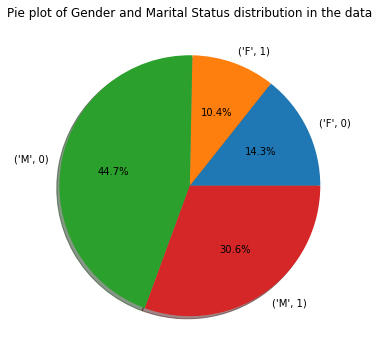

In [104]:
plt.figure(figsize=(16,6))
plt.pie(gen_x_marital.values, labels=gen_x_marital.index, autopct="%1.1f%%", shadow=True)
plt.title("Pie plot of Gender and Marital Status distribution in the data")

In [97]:
gen_x_marital_x_purcahse = data2.groupby(['Gender', 'Marital_Status'])['Purchase'].mean()
gen_x_marital_x_purcahse

Gender  Marital_Status
F       0                 8679.845815
        1                 8810.249789
M       0                 9453.756740
        1                 9413.817605
Name: Purchase, dtype: float64

Text(0.5, 1.0, 'Avg Purchase comparison based on Gender and Marital Status')

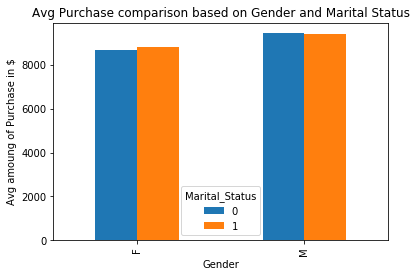

In [108]:
gen_x_marital_x_purcahse.unstack(level=1).plot(kind='bar')
plt.ylabel("Avg amoung of Purchase in $")
plt.title("Avg Purchase comparison based on Gender and Marital Status")

#### The both graphs shows different shopping trend by gender and their marital status. 
<ul>
    <li>We can observe from the pie chart that marital status influenced males a lot in their shopping habit then females. (Male: 44.7% -> 30.6% while Female: 14.3% -> 10.4%)</li>
    <li>The average amount of purchase of females slightly increase when they got married which is opposite on male shoppers' situation. </li>
</ul>

### Which product is popular for each age group?

In [113]:
age_x_product = data2.groupby('Age')['Product_ID'].apply( lambda x : x.value_counts().index[0]).reset_index()
age_x_product

,Age,Product_ID
0,0-17,P00255842
1,18-25,P00265242
2,26-35,P00265242
3,36-45,P00025442
4,46-50,P00265242
5,51-55,P00265242
6,55+,P00265242


#### Product P00265242 is the most popular product to all age groups, except age group 0-17 and 36-45. 

### What is percentage of purchase for each gender and age group?

Text(0.5, 1.0, 'Percentage of Purchase by Gender')

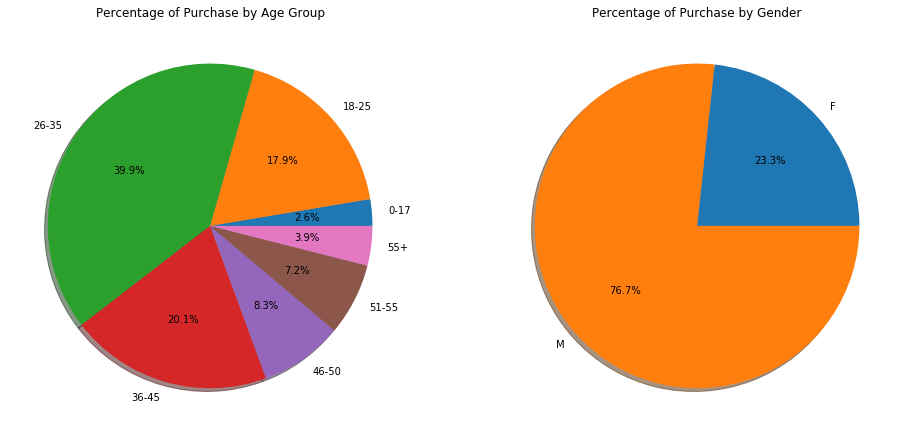

In [117]:
age_x_purchase_sum = data2.groupby('Age')['Purchase'].sum()
gender_x_purchase_sum = data2.groupby('Gender')['Purchase'].sum()

plt.figure(figsize=(16,16))
plt.subplot(121)
plt.pie(age_x_purchase_sum.values, labels=age_x_purchase_sum.index, autopct="%1.1f%%", shadow=True)
plt.title("Percentage of Purchase by Age Group")
plt.subplot(122)
plt.pie(gender_x_purchase_sum.values, labels=gender_x_purchase_sum.index, autopct="%1.1f%%", shadow=True)
plt.title("Percentage of Purchase by Gender")

#### Things to note from the pie graphs above:
<ul>
    <li>About 40% of purchases were made by 26-35 age group, followed by 36-45, 18-25.</li>
    <li>Age group with the lowest purchase proportion is 0-17 which is kinda obvious.</li>
    <li>Interestingly enough, most of the percentage of purchase were male customers.</li>
</ul>

### Findings from above analysis:
<ol>
    <li>People of Age group 51-55 have purchased with high amount per person (9600 dollars per person).</li>
    <li>75% of total people visited were Male and 60% of total people were between Age 26-45.</li>
    <li>People from Age group 26-35 collectively have spent more amount (40% of sale purchase is from this group).</li>
    <li>P00265242 was the product which attratcted most of the adults and P00255842 attracted 0-17 Age group.</li>
    <li>Unmarreid Male who are 45% in the datset have spent 9000 dollars per person.</li>
    <li>Even though less no of customers are of Ocuupation 12,15,17 the spend more rougly 9800 dollars per person.</li>
    <li>Highest No of customers are from Occupation 0,4 and 7.</li>
    <li>High no of customers are of newly settled people but customers who are 2 years residents have spent 9400 dollars per person.</li>
    <li>Product P00025442 has got highest total sale amount of about 27.5 million but it is not the highest repeated product in sale P00265242 was highest repeated with 1858 times(1858 customers have bought this).</li>
</ol>

# Data modeling & Prediction

For data modeling, let's split the data into train and test datasets.

In [33]:
from sklearn.model_selection import train_test_split

X = data.iloc[:, 0:9].values #all the other cols 
y = data.iloc[:, 9].values # Purchase values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [34]:
print("Length of X_train: " + str(len(X_train)))
print("Length of y_train: " + str(len(y_train)))
print("Length of X_test: " + str(len(X_test)))
print("Length of y_test: " + str(len(y_test)))

Length of X_train: 440054
Length of y_train: 440054
Length of X_test: 110014
Length of y_test: 110014


In [35]:
X_train

array([['M', '26-35', 7, ..., 8, 9.842329251122386, 12.668243206790512],
       ['M', '26-35', 14, ..., 8, 17.0, 12.668243206790512],
       ['M', '18-25', 7, ..., 8, 9.842329251122386, 12.668243206790512],
       ...,
       ['F', '46-50', 15, ..., 5, 9.842329251122386, 12.668243206790512],
       ['M', '18-25', 4, ..., 2, 4.0, 12.668243206790512],
       ['M', '55', 17, ..., 8, 17.0, 12.668243206790512]], dtype=object)

In [36]:
y_train

array([ 8109, 10071,  2290, ...,  6991, 13251,  9905])

In [37]:
X_test

array([['M', '18-25', 0, ..., 1, 6.0, 12.668243206790512],
       ['M', '51-55', 1, ..., 12, 9.842329251122386, 12.668243206790512],
       ['M', '26-35', 11, ..., 6, 8.0, 15.0],
       ...,
       ['M', '36-45', 0, ..., 1, 2.0, 16.0],
       ['M', '26-35', 7, ..., 1, 2.0, 9.0],
       ['M', '36-45', 11, ..., 6, 8.0, 10.0]], dtype=object)

In [38]:
y_test

array([15228,  1088, 16426, ..., 19456, 19586, 16544])

### Since there are categorical variables in the datasets, we need to encode them before we dive into the data modeling process. (Ex. 'M' and 'F' in Gender column)

In [39]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X_train = LabelEncoder() # creating instance of labelencoder
X_train

array([['M', '26-35', 7, ..., 8, 9.842329251122386, 12.668243206790512],
       ['M', '26-35', 14, ..., 8, 17.0, 12.668243206790512],
       ['M', '18-25', 7, ..., 8, 9.842329251122386, 12.668243206790512],
       ...,
       ['F', '46-50', 15, ..., 5, 9.842329251122386, 12.668243206790512],
       ['M', '18-25', 4, ..., 2, 4.0, 12.668243206790512],
       ['M', '55', 17, ..., 8, 17.0, 12.668243206790512]], dtype=object)

### Encode 'M' and 'F' to 1 and 0 in Gender column

In [40]:
X_train[:, 0] = labelencoder_X_train.fit_transform(X_train[:, 0])
X_train

array([[1, '26-35', 7, ..., 8, 9.842329251122386, 12.668243206790512],
       [1, '26-35', 14, ..., 8, 17.0, 12.668243206790512],
       [1, '18-25', 7, ..., 8, 9.842329251122386, 12.668243206790512],
       ...,
       [0, '46-50', 15, ..., 5, 9.842329251122386, 12.668243206790512],
       [1, '18-25', 4, ..., 2, 4.0, 12.668243206790512],
       [1, '55', 17, ..., 8, 17.0, 12.668243206790512]], dtype=object)

### Encode '26-35', '46-50' ... to numbers in Age column

In [41]:
X_train[:, 1] = labelencoder_X_train.fit_transform(X_train[:, 1])
X_train

array([[1, 2, 7, ..., 8, 9.842329251122386, 12.668243206790512],
       [1, 2, 14, ..., 8, 17.0, 12.668243206790512],
       [1, 1, 7, ..., 8, 9.842329251122386, 12.668243206790512],
       ...,
       [0, 4, 15, ..., 5, 9.842329251122386, 12.668243206790512],
       [1, 1, 4, ..., 2, 4.0, 12.668243206790512],
       [1, 6, 17, ..., 8, 17.0, 12.668243206790512]], dtype=object)

### Encode 'A', 'B', ... to numbers in City_Category column

In [42]:
X_train[:, 3] = labelencoder_X_train.fit_transform(X_train[:, 3])
X_train

array([[1, 2, 7, ..., 8, 9.842329251122386, 12.668243206790512],
       [1, 2, 14, ..., 8, 17.0, 12.668243206790512],
       [1, 1, 7, ..., 8, 9.842329251122386, 12.668243206790512],
       ...,
       [0, 4, 15, ..., 5, 9.842329251122386, 12.668243206790512],
       [1, 1, 4, ..., 2, 4.0, 12.668243206790512],
       [1, 6, 17, ..., 8, 17.0, 12.668243206790512]], dtype=object)

### Doing the same process for X_test dataset

In [43]:
labelencoder_X_test = LabelEncoder()
X_test[:, 0] = labelencoder_X_test.fit_transform(X_test[:, 0])
X_test[:, 1] = labelencoder_X_test.fit_transform(X_test[:, 1])
X_test[:, 3] = labelencoder_X_test.fit_transform(X_test[:, 3])
X_test

array([[1, 1, 0, ..., 1, 6.0, 12.668243206790512],
       [1, 5, 1, ..., 12, 9.842329251122386, 12.668243206790512],
       [1, 2, 11, ..., 6, 8.0, 15.0],
       ...,
       [1, 3, 0, ..., 1, 2.0, 16.0],
       [1, 2, 7, ..., 1, 2.0, 9.0],
       [1, 3, 11, ..., 6, 8.0, 10.0]], dtype=object)

## Scaling
#### Scale all the variables to avoid issues due to different measurement scales.
#### Scaling and standardizing can help features arrive in more digestible form for these algorithms.

StandardScaler will transform your data such that its distribution will have a <b>mean value 0</b>and <b>standard deviation of 1</b>.<br>
In case of multivariate data, this is done feature-wise (in other words <b>independently for each column of the data</b>).<br>
Given the distribution of the data, each value in the dataset will have the mean value subtracted, and then divided by the standard deviation of the whole dataset (or feature in the multivariate case).

In [44]:
from sklearn.preprocessing import StandardScaler
sc_X_train = StandardScaler() #create StandardScaler object
X_train = sc_X_train.fit_transform(X_train)

sc_X_test = StandardScaler()
X_test = sc_X_test.fit_transform(X_test)

In [45]:
X_train

array([[ 5.72471296e-01, -3.66035532e-01, -1.65325470e-01, ...,
         6.59990217e-01, -5.98244544e-04,  3.74743952e-04],
       [ 5.72471296e-01, -3.66035532e-01,  9.07977195e-01, ...,
         6.59990217e-01,  1.69928406e+00,  3.74743952e-04],
       [ 5.72471296e-01, -1.10460860e+00, -1.65325470e-01, ...,
         6.59990217e-01, -5.98244544e-04,  3.74743952e-04],
       ...,
       [-1.74681247e+00,  1.11111060e+00,  1.06130615e+00, ...,
        -1.02510892e-01, -5.98244544e-04,  3.74743952e-04],
       [ 5.72471296e-01, -1.10460860e+00, -6.25312327e-01, ...,
        -8.65012001e-01, -1.38809879e+00,  3.74743952e-04],
       [ 5.72471296e-01,  2.58825673e+00,  1.36796405e+00, ...,
         6.59990217e-01,  1.69928406e+00,  3.74743952e-04]])

### Now that we scaled the data, let's fit the model
<b>Random Forest Regressor: </b><br>
Random forest is a type of supervised machine learning algorithm based on ensemble learning. <b>Ensemble learning</b> is a type of learning where you join different types of algorithms or same algorithm multiple times to form a more powerful prediction model. The random forest algorithm combines multiple algorithm of the same type i.e. multiple decision trees, resulting in a forest of trees, hence the name "Random Forest". The random forest algorithm can be used for both regression and classification tasks.
<ol> <b>Advantages of Random Forest Regression</b>
    <li>Pick at random K data points from the training set</li>
    <li>Build the decision tree associated with those K data points</li>
    <li>Choose the number Ntree of trees you want to build and repeat step 1 and 2</li>
    <li>For a new data point, make each one of your Ntree trees predict the value of Y for the data point, and assign the new data point the average across all of the predicted Y values.</li>
</ol>

<ol><b>Disadantage of Random Forest Regression</b>
    <li>May observe overfitting for some datasets with noisy classification/regression tasks</li>
</ol>

#### We're gonna use Mean Absolute Error to examine how well our model predicts
<b>Absolute Error: </b><br>
Absolute Error is the amount of error in your measurements. It is the difference between the measured value and “true” value. For example, if a scale states 90 pounds but you know your true weight is 89 pounds, then the scale has an absolute error of 90 lbs – 89 lbs = 1 lbs.<br>
(Δx) = xi – x<br>
where xi = the measurement and x = the true value<br>

<b>Mean Absolute Error: </b><br>
The Mean Absolute Error(MAE) is the average of all absolute errors. 


In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [47]:
def get_mae(k, X_train, X_test, y_train, y_test):
    model = RandomForestRegressor(max_leaf_nodes=k, random_state=0) #create the model object #n_estimators=100 default
    model.fit(X_train, y_train)#fit the model
    
    y_pred = model.predict(X_test) #prediction
    mae = mean_absolute_error(y_test, y_pred) #compare y_test and y_pred and return MAE
    return mae

In [48]:
for k in [5, 50, 100, 300, 500, 700, 800, 850]:
    my_mae = get_mae(k, X_train, X_test, y_train, y_test)
    print("Max leaf nodes (K): %d \t\t Mean Absolute Error: %d" %(k, my_mae))

Max leaf nodes (K): 5 		 Mean Absolute Error: 2824
Max leaf nodes (K): 50 		 Mean Absolute Error: 2243
Max leaf nodes (K): 100 		 Mean Absolute Error: 2217
Max leaf nodes (K): 300 		 Mean Absolute Error: 2196
Max leaf nodes (K): 500 		 Mean Absolute Error: 2190
Max leaf nodes (K): 700 		 Mean Absolute Error: 2186
Max leaf nodes (K): 800 		 Mean Absolute Error: 2185
Max leaf nodes (K): 850 		 Mean Absolute Error: 2184


In [49]:
y_test

array([15228,  1088, 16426, ..., 19456, 19586, 16544])

### Let's fit the model with the best number of n_estimators (num of trees) to avoid underfitting and overfitting.

In [50]:
rf_regressor = RandomForestRegressor(n_estimators=700, random_state=0)
rf_regressor.fit(X_train, y_train)
y_pred = rf_regressor.predict(X_test)

In [51]:
y_pred

array([15423.68613776,  1194.99380159, 15756.52502721, ...,
       16241.02920648, 14855.04645396, 14345.97086224])

In [52]:
pd.DataFrame(y_pred).describe()

,0
count,110014.000000
mean,9247.365868
std,4324.750136
min,14.630893
25%,6239.717836
50%,7796.456055
75%,12855.847714
max,23694.806024


(array([ 2145.,  1959.,  2403.,  3389., 11587., 23006., 16712.,  6109.,
         4410.,  5393.,  6633.,  7271.,  7041.,  5464.,  3316.,  1886.,
          723.,   303.,   171.,    93.]),
 array([1.46308929e+01, 1.19863965e+03, 2.38264841e+03, 3.56665716e+03,
        4.75066592e+03, 5.93467468e+03, 7.11868343e+03, 8.30269219e+03,
        9.48670095e+03, 1.06707097e+04, 1.18547185e+04, 1.30387272e+04,
        1.42227360e+04, 1.54067447e+04, 1.65907535e+04, 1.77747622e+04,
        1.89587710e+04, 2.01427798e+04, 2.13267885e+04, 2.25107973e+04,
        2.36948060e+04]),
 <a list of 20 Patch objects>)

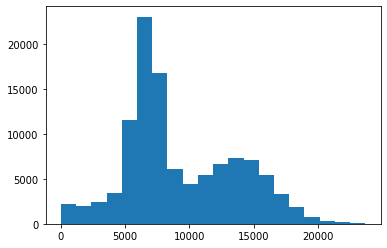

In [53]:
plt.hist(y_pred, bins=20)